In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

curr_dir = os.getcwd()
root_dir = Path(curr_dir).absolute().parent
results_dir = Path.joinpath(root_dir, "results/fedasync/cifar10/cifar10_low-poly")
server = pd.read_csv(Path.joinpath(results_dir, os.listdir(results_dir)[0]), index_col=False)
clients = pd.read_csv(Path.joinpath(results_dir, os.listdir(results_dir)[1]), index_col=False)

C:\Users\cml\AppData\Local\Temp\ipykernel_19520\2903630108.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  clients = pd.read_csv(Path.joinpath(results_dir, os.listdir(results_dir)[1]), index_col=False)


In [2]:
server

,aggregations,round,elapsed_time,comm_time,round_time,comm_overhead,train_loss,test_loss,accuracy
0,1,1,57.995204,1.467142,35.030027,18.339272,2.086533,2.310468,0.100000
1,5,2,69.801988,1.467142,44.895075,33.621998,2.044143,2.300820,0.100000
2,6,3,97.150554,0.489047,22.529232,48.904724,1.970664,2.059132,0.244684
3,9,4,110.138731,1.222618,28.294573,61.130905,1.947608,2.288870,0.100000
4,10,5,129.429230,1.222618,23.907272,73.357086,1.998181,2.329132,0.100000
5,12,6,146.992948,0.978094,26.690926,82.526722,1.877986,2.170299,0.174888
6,14,7,189.464401,0.733571,24.265849,94.752903,1.823377,2.190577,0.146443
7,15,8,220.564798,0.978094,20.036506,103.922539,1.939296,2.208952,0.165869
8,16,9,221.522796,0.733571,21.525537,110.035629,1.864838,2.525395,0.142529
9,17,10,253.285202,0.489047,21.530660,116.148720,1.914017,2.211962,0.154084


In [3]:
clients

,round,client_id,train_loss,test_loss,accuracy,precision,recall,staleness
0,1,7,2.086533,2.310468,0.456752,0.100000,0.008500,0.100000
1,2,2,2.104553,2.308106,0.455882,0.100000,0.009400,0.100000
2,2,1,2.082685,2.308826,0.449166,0.100000,0.009500,0.100000
3,2,5,2.093865,2.303808,0.450000,0.100000,0.009800,0.100000
4,2,10,1.895468,2.282541,0.366642,0.100000,0.020100,0.100000
5,3,4,1.970664,2.059132,0.759642,0.244684,0.277176,0.244684
6,4,6,2.009918,2.314948,0.712788,0.100000,0.009800,0.100000
7,4,10,1.815423,2.245190,0.569876,0.100000,0.011000,0.100000
8,4,5,2.017483,2.306471,0.721133,0.100000,0.012100,0.100000
9,5,2,1.998181,2.329132,0.708590,0.100000,0.010900,0.100000


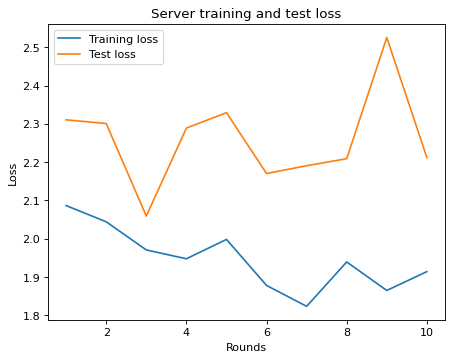

In [4]:
# Plot server loss
train_loss = server['train_loss']
test_loss = server['test_loss']
rounds = range(1, len(train_loss)+1)

plt.figure(dpi=80)
plt.plot(rounds, train_loss, label='Training loss')
plt.plot(rounds, test_loss, label='Test loss')
plt.title('Server training and test loss')
plt.xlabel('Rounds')
plt.ylabel('Loss')
plt.legend()
plt.show()

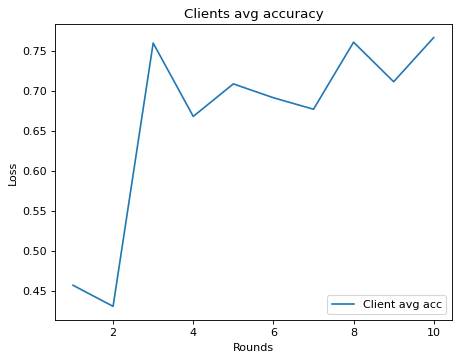

In [5]:
avg_acc = clients.groupby('round')['accuracy'].mean()

plt.figure(dpi=80)
plt.plot(rounds, avg_acc, label='Client avg acc')
plt.title('Clients avg accuracy')
plt.xlabel('Rounds')
plt.ylabel('Loss')
plt.legend()
plt.show()

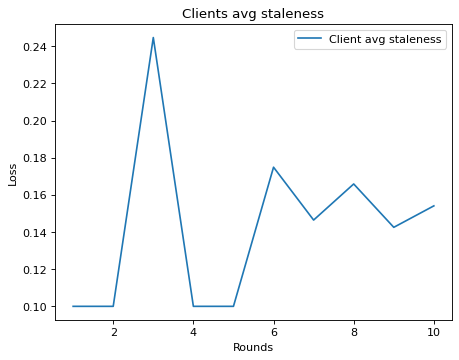

In [6]:
avg_staleness = clients.groupby('round')['staleness'].mean()

plt.figure(dpi=80)
plt.plot(rounds, avg_staleness, label='Client avg staleness')
plt.title('Clients avg staleness')
plt.xlabel('Rounds')
plt.ylabel('Loss')
plt.legend()
plt.show()